<a href="https://colab.research.google.com/github/kimayeon-hub/DeepLearning1/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 데이터 인식
- 딥러닝 중에 가장 보편적인 것이 이미지 인식임
- 이미지 인식이 가장 핵심적인 기술 중 하나
- 가장 빨리 발전하는 기술 중 하나

## 실습: 코딩 없이 이미지 인식을 해 보기

### 이미지 다운로드
- 강아지, 고양이 이미지를 각 10장 씩 구글에서 다운로드
- `딥러닝1 > Week6 > 강아지 고양이 이미지`에 저장

### teachable machine(티쳐블 머신) 사용
- 이미지 인식 등을 위한 기본 모델들을 마들어 두고, 사용자가 몇 장의 사진을 추가하면, 이를 추가적으로 학습하여 손쉽게 인공지능을 경험하고 사용할 수 있도록 해주는 웹사이트
> 모델을 굉장히 간단히 사용할 수 있음
- 사용 방법
  1. `get start` 버튼 누르기
  2. 이미지 데이터를 다룰 것이므로 'Image Project' 선택
  3. `표준 이미지 모델` 선택
  4. train data 업로드
  5. 모델 학습
    - 고급 > epoch, batch_size, learning rate 설정할 수 있음
    - 고급 설정 > 에포크별 정확도, 에포크별 손실 그래프를 볼 수 있음
  
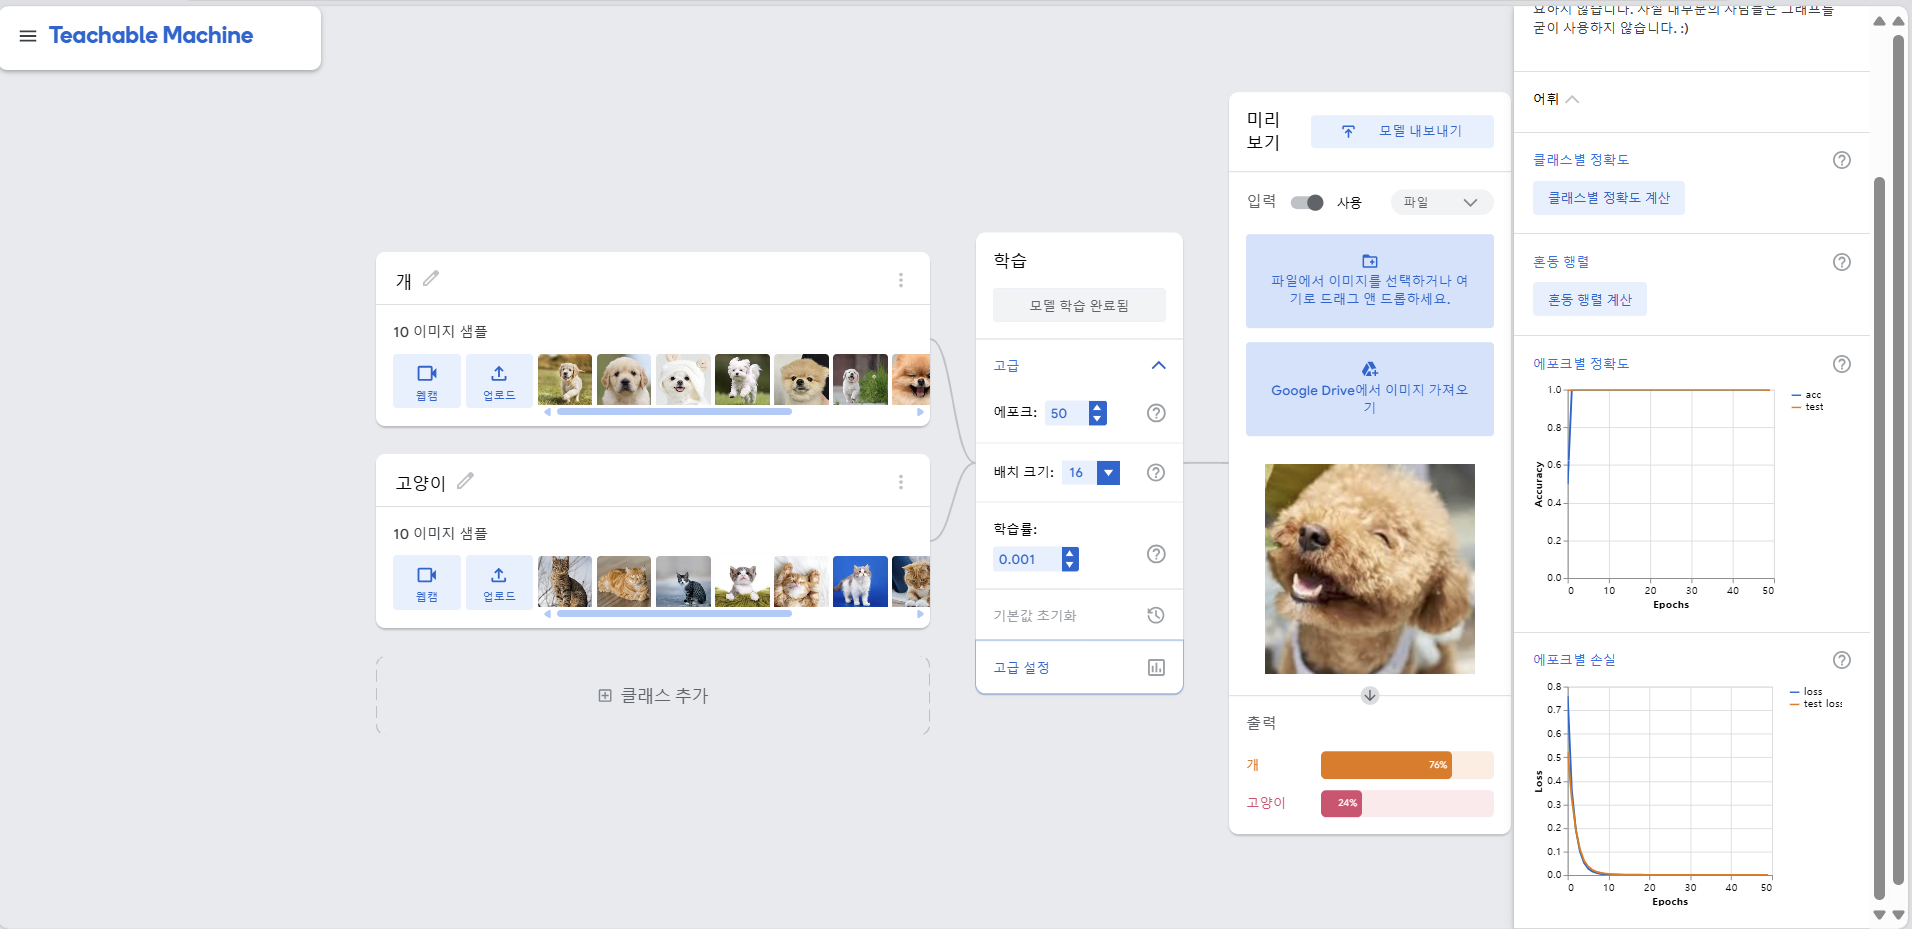

# convolution (합성곱)과 이미지
- convolution: 두 개 행렬에 대한 연산 방법
  - 두 행렬의 값을 원소 단위로 곱하여 더하는 것
  - **특징**: 행렬 원소 각각의 값들과 그 주변 값들과의 관계를 고려하여 계산을 함
  - **제로-패딩**: 행렬 주변에 0으로 된 패드가 존재한다고 가정해, 행렬과 동일한 크기의 결과 행렬을 얻을 수 있게 됨
  - **필터**: 합성곱이 딥러닝에 적용될 때 합성곱에 사용되는 행렬
    - **엣지 필터**: 이미지에서 엣지를 찾아 내주는 필터
      -  가로로 얼마나 차이나는지 확인하는 필터
      > 합성곱 계산했을 때 255 넘어가는 값은 255로하자

        `-1 0 1` <br>
        `-1 0 1` <br>
        `-1 0 1`
      - 세로로 얼마나 차이 나는지 확인하는 필터

        `-1 -1 -1` <br>
        ` 0  0  0` <br>
        ` 1  1  1`

      > 복잡한 이미지를 단순하게 만들어줌 (이미지 처리의 가장 기초)


- 이미지 데이터
  - 2차원상의 행렬 (배열)


> 이미지 데이터에 합성곱을 사용하면 위치 정보가 유지되면서도 픽셀값들의 공간적인 변화를 강조하도록 이미지를 변환할 수 있음



## 엣지 필터 실습: 합성곱을 통해 이미지의 윤곽선 추출하기

### 이미지를 회색으로 변환하기
- `cv2` 라이브러리 사용
  - opencv라고 하는 컴퓨터 비전 라이브러리
  - 이미지를 처리하는 다양한 함수를 제공하고 있어 유용
- `cv2_imread` 함수 사용
  - 읽어온 이미지를 화면에 표시하는 함수
  - `cv2.IMREAD_GRAYSCALE` 옵션: 이미지 파일을 그레이스케일로 읽겠다고 명시하는 것
  > 왜 이미지를 회색으로 읽었느냐? <br>
  > 회색 이미지는 2차원임. 컬러 이미지로 하면 3차원이라서 복잡하므로 이렇게 읽은 것

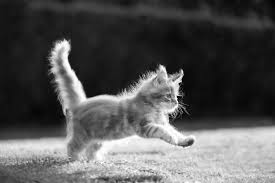

In [1]:
import cv2
from google.colab.patches import cv2_imshow   # 코렙 안에서 이미지를 뿌리기 위해서 조금 변경하는 것
img = cv2.imread('다운로드 (5).jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

### 세로 형태의 윤곽선 찾기
- 3 X 3 넘파이 배열(필터)을 하나 만들고,
- opencv에서 제공하는 `filter2D` 함수를 사용하여 합성곱을 계산하기
  - 첫 번째 parameter: 원본 이미지
  - 두 번째 parameter: 이미지의 비트 수와 관계된 것
    - `-1`: 원본 이미지와 동일한 비트 수를 가지도록 한다는 뜻
  - 세 번째 parameter: 원본 이미지에 합성곱을 수행할 행렬(필터)

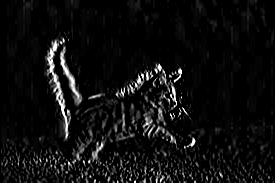

In [2]:
import numpy as np

# 세로 형태의 엣지를 찾는 필터
filter = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# 필터 적용하는 함수
f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

### 가로 형태의 윤곽선 찾기

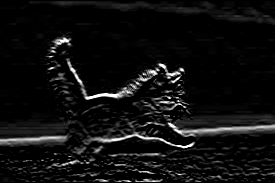

In [3]:
import numpy as np

# 가로 형태의 엣지를 찾는 필터
filter = np.array([[-1,-1,-1],
                   [0, 0, 0],
                   [1, 1, 1]])

# 필터 적용하는 함수
f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

### 가로, 세로 윤곽선 추출하기
- 넘파이의 maximum 함수를 사용

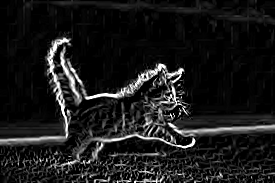

In [5]:
# 세로 형태의 엣지를 찾는 필터
filter1 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

# 가로 형태의 엣지를 찾는 필터
filter2 = np.array([[-1,-1,-1],
                   [0, 0, 0],
                   [1, 1, 1]])

f_img1 = cv2.filter2D(img, -1, filter1)   # 세로 엣지 이미지
f_img2 = cv2.filter2D(img, -1, filter2)   # 가로 엣지 이미지

# 세로, 가로 엣지 합치기
f_img = np.maximum(f_img1, f_img2)
cv2_imshow(f_img)

## 평균 필터
- 필터의 값을 다 더하면 1임
- 합성곱을 했을 때 값이 너무 커지거나 작아지지 않음
> 밝기를 어느 정도 유지하는 것

### 이미지가 흐려지는 필터

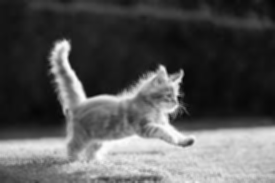

In [6]:
import numpy as np

# 평균 필터(이미지가 흐려짐)
filter = np.array([[1/9,1/9,1/9],
                   [1/9,1/9,1/9],
                  [1/9,1/9,1/9]])

 # 필터 적용하는 함수
f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

### 밝기를 어느 정도 유지하는 필터
- 가오시안에 가까움

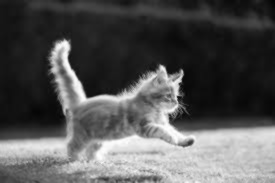

In [7]:
# 평균 필터 -> 가오시안에 가까움
filter = np.array([[1/16,1/16,1/16],
                  [1/16,1/2,1/16],
                   [1/16,1/16,1/16]])

f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

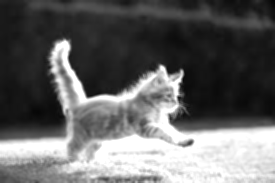

In [8]:
# 이미지를 위의 필터보다 밝게 만드는 필터
filter = np.array([[1.2/9, 1.2/9, 1.2/9],
                   [1.2/9, 1.2/9, 1.2/9],
                   [1.2/9, 1.2/9, 1.2/9]])

f_img = cv2.filter2D(img, -1, filter)
cv2_imshow(f_img)

# 합성곱 공부의 목적: 이러한 필터의 값을 딥러닝을 이용해서 찾을 것